In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [26]:
grafo = nx.read_gexf("grafo.gexf")

### Grado
Los `sorted_degrees` son los personajes en orden de aparición en la mayor cantidad de cómics.

In [27]:
degree_dict = dict(grafo.degree())
sorted_degrees = dict(sorted(degree_dict.items(), key=lambda item: item[1], reverse=True))
sorted_degrees

{'X-Men': 65,
 'Beast': 25,
 'Thor': 24,
 'Cable': 22,
 'Spider-Man (Peter Parker)': 21,
 'X-Force': 18,
 'Captain America': 17,
 'Cyclops': 16,
 'Loki': 16,
 'Boomer': 16,
 'Iron Man': 14,
 'Magneto': 14,
 'Gambit': 13,
 'Rogue': 13,
 'Captain Britain': 13,
 'Fantomex': 13,
 'Captain Marvel (Mar-Vell)': 13,
 'Gargoyle (Isaac Christians)': 13,
 'Rictor': 13,
 'Shatterstar': 13,
 'Warpath': 13,
 'Juggernaut': 12,
 'Thunderbolts': 12,
 'Emma Frost': 12,
 'Surge': 12,
 'Cannonball': 12,
 'Wolverine': 11,
 'Norman Osborn': 11,
 'Domino': 11,
 'Psylocke': 11,
 'Sabretooth': 10,
 'Banshee (Theresa Rourke)': 10,
 'Doctor Strange': 9,
 'Fantastic Four': 9,
 'Beak': 9,
 'New X-Men': 9,
 'Thing': 9,
 'Absorbing Man': 9,
 'Avengers': 9,
 'Immortus': 9,
 'Odin': 9,
 'Surtur': 9,
 'Archangel': 9,
 'Spiral (Rita Wayword)': 9,
 'Nick Fury (Ultimate)': 8,
 'Swordsman': 8,
 'Black Bolt': 8,
 'Medusa': 8,
 'Uatu The Watcher': 8,
 'Armor (Hisako Ichiki)': 8,
 'Avalanche': 8,
 'Bling!': 8,
 'Firestar': 8,

### Centralidad
#### Centralidad de grado (Degree centrality)
Los `top_nodes` son los 10 nodos más centrales, es decir los nodos que más aristas tienen. En este contexto, son los personajes que aparecen en la mayor cantidad de cómics.

In [28]:
degree_centrality = nx.degree_centrality(grafo)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_nodes = sorted_degree_centrality[:10] 
top_nodes

[('X-Men', 0.3735632183908046),
 ('Beast', 0.14367816091954022),
 ('Thor', 0.13793103448275862),
 ('Cable', 0.12643678160919541),
 ('Spider-Man (Peter Parker)', 0.12068965517241378),
 ('X-Force', 0.10344827586206896),
 ('Captain America', 0.09770114942528735),
 ('Cyclops', 0.09195402298850575),
 ('Loki', 0.09195402298850575),
 ('Boomer', 0.09195402298850575)]

#### Centralidad de cercanía (Closeness centrality)
Los `top_closeness` son los nodos que pueden llegar más rápidamente a todos los demás nodos de la red. Representan personajes "accesibles" dentro de la estructura.

In [29]:
closeness_centrality = nx.closeness_centrality(grafo)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_closeness = sorted_closeness[:10]
top_closeness

[('X-Men', 0.3574950690335306),
 ('Norman Osborn', 0.338468720821662),
 ('Spider-Man (Peter Parker)', 0.3292461398728429),
 ('X-23', 0.32657657657657657),
 ('Fantomex', 0.3146701388888889),
 ('Jubilee', 0.3066835871404399),
 ('Wolverine', 0.30360134003350087),
 ('Doctor Strange', 0.29616013071895425),
 ('X-Statix', 0.2890749601275917),
 ('Dead Girl', 0.2890749601275917)]

#### Centralidad de intermediación (Betweenness centrality)
Los `top_betweenness` son los nodos que más frecuentemente aparecen como intermediarios en los caminos más cortos entre pares de nodos. Son "puentes" entre distintas partes de la red.

In [30]:
betweenness_centrality = nx.betweenness_centrality(grafo)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_betweenness = sorted_betweenness[:10]
top_betweenness

[('X-Men', 0.37010897602386544),
 ('Spider-Man (Peter Parker)', 0.28094504326316183),
 ('Wolverine', 0.1427258919186366),
 ('Norman Osborn', 0.13188379290631644),
 ('Thor', 0.10665281997253287),
 ('X-23', 0.090670426289322),
 ('Doctor Strange', 0.08969503687462627),
 ('Fantastic Four', 0.08176643855336299),
 ('Fantomex', 0.07511484355713964),
 ('Iron Man', 0.06620488507572421)]

#### Centralidad de vector propio (Eigenvector centrality)
Los `top_eigenvector` son los nodos que están conectados con otros nodos que también son importantes. Representan influencia estructural dentro de la red.

In [31]:
eigenvector_centrality = nx.eigenvector_centrality(grafo, max_iter=1000)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_eigenvector = sorted_eigenvector[:10]
top_eigenvector

[('X-Men', 0.45978649727456095),
 ('Beast', 0.2944970173827195),
 ('X-Force', 0.22707406681126996),
 ('Cable', 0.22304448604283264),
 ('Boomer', 0.21952224800195472),
 ('Warpath', 0.17425721212442793),
 ('Rictor', 0.17051153004994543),
 ('Shatterstar', 0.17051153004994543),
 ('Cannonball', 0.16967231572433963),
 ('Domino', 0.1677942375124756)]

### PageRank

PageRank mide la importancia relativa de un nodo dentro de un grafo, basado en la idea de que un nodo es importante si otros nodos importantes lo enlazan.

In [32]:
pagerank_dict = nx.pagerank(grafo, alpha=0.85)
top10_pr = sorted(pagerank_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (PageRank):")
top10_pr

Top 10 (PageRank):


[('X-Men', 0.042415590439747373),
 ('Spider-Man (Peter Parker)', 0.019749625108749655),
 ('Thor', 0.01666705942570177),
 ('Thunderbolts', 0.013919000892036312),
 ('Beast', 0.01358263712170172),
 ('Cable', 0.012883311958569916),
 ('Captain America', 0.012340551016442512),
 ('Loki', 0.011095178816805643),
 ('Iron Man', 0.010947445336606125),
 ('X-Force', 0.010546927559157255)]

### Visualización y comunidades

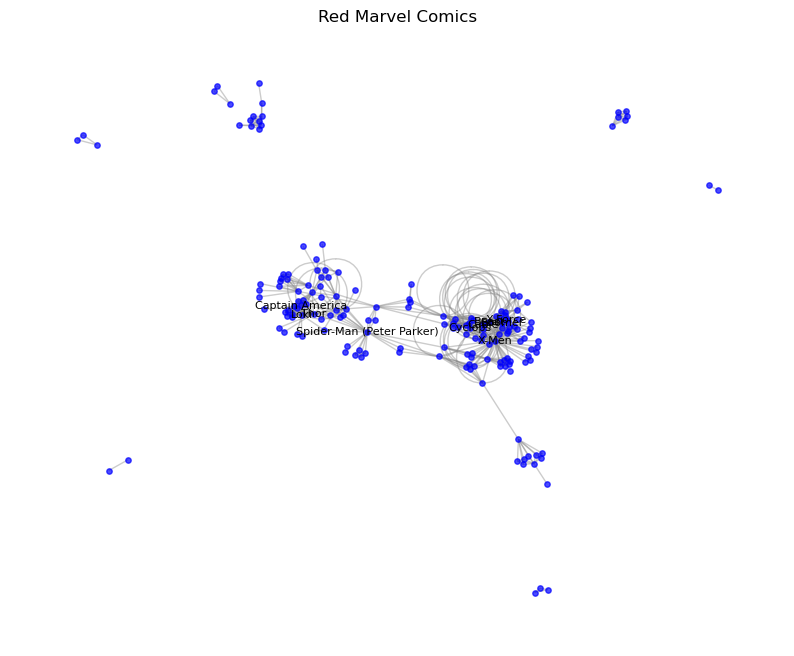

In [33]:
pos = nx.spring_layout(grafo, seed=42)

degree_centrality = nx.degree_centrality(grafo)
labels = {n: n for n, v in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]}

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(grafo, pos, node_size=15, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(grafo, pos, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(grafo, pos, labels=labels, font_size=8)
plt.axis('off')
plt.title("Red Marvel Comics")
plt.show()

/var/folders/f6/1hghhh1x5nq6k8k89mc457j40000gq/T/ipykernel_41890/2033829463.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', num_comunidades)


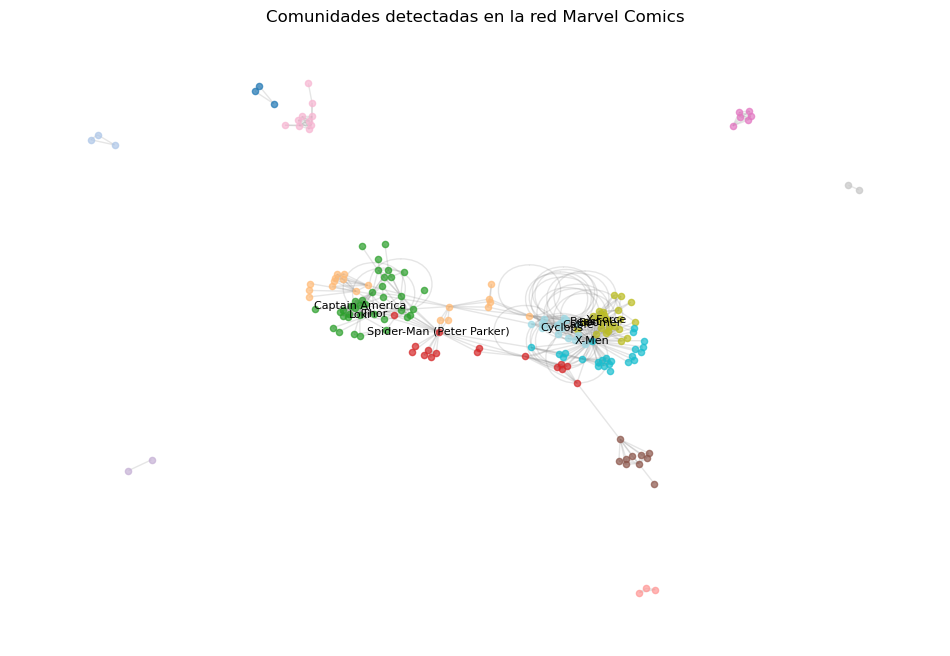

In [34]:
import matplotlib.pyplot as plt

communities_louvain = community.louvain_communities(grafo)
num_comunidades = len(communities_louvain)
pos = nx.spring_layout(grafo, seed=42)

plt.figure(figsize=(12,8))
cmap = plt.cm.get_cmap('tab20', num_comunidades)

for idx, comm_set in enumerate(communities_louvain):
    nx.draw_networkx_nodes(
        grafo,
        pos,
        nodelist=list(comm_set),
        node_color=[cmap(idx)],
        node_size=20,
        alpha=0.7
    )

nx.draw_networkx_edges(grafo, pos, alpha=0.2, edge_color='gray')
nx.draw_networkx_labels(grafo, pos, labels=labels, font_size=8)
plt.axis('off')
plt.title("Comunidades detectadas en la red Marvel Comics")
plt.show()


In [35]:
from IPython.display import display, Markdown

for i, comunidad in enumerate(communities_louvain):
    texto = f"#### Comunidad {i+1} ({len(comunidad)} nodos)\n"
    texto += ', '.join(comunidad)
    display(Markdown(texto))


#### Comunidad 1 (3 nodos)
Professor X, Forge, Mystique

#### Comunidad 2 (3 nodos)
Impossible Man, New Mutants, Warlock (Technarchy)

#### Comunidad 3 (19 nodos)
Marrow, Agent Zero, Fantomex, Chamber, Speed Demon, Blizzard, Wolverine, Squadron Sinister, Shocker (Herman Schultz), Thunderbolts, Zemo, Hercules, Wonder Man, Radioactive Man, Swordsman, Joystick, Weapon X, Songbird, Moonstone

#### Comunidad 4 (37 nodos)
Ant-Man (Hank Pym), Medusa, Juggernaut, S.H.I.E.L.D., Dazzler, Avengers, Nightcrawler, Captain Britain, Gargoyle (Isaac Christians), Bedlam, Odin, Black Bolt, Tempest, Hulk, Loki, Absorbing Man, Captain Marvel (Mar-Vell), Surtur, Wasp, Captain Marvel (Carol Danvers), Dum Dum Dugan, Malekith, Excalibur, Marvel Zombies, Hela, Immortus, Uatu The Watcher, Iron Man, Lionheart, Mysterio, Thor, Nocturne, Pete Wisdom, Black Widow, Nick Fury, Captain America, Kitty Pryde

#### Comunidad 5 (16 nodos)
May Parker, Gwen Stacy, Union Jack (Joseph Chapman), Norman Osborn, Spider-Man (Peter Parker), Green Goblin (Norman Osborn), Black Cat, Vulture (Adrian Toomes), Dead Girl, Hobgoblin (Roderick Kingsley), Doctor Octopus, Mary Jane Watson, X-Statix, Peter Parker, Namor, Doctor Strange

#### Comunidad 6 (3 nodos)
Iron Fist (Danny Rand), Luke Cage, Jessica Jones

#### Comunidad 7 (2 nodos)
Rocket Raccoon, Groot

#### Comunidad 8 (10 nodos)
Invisible Woman, Skrulls, Human Torch, Fantastic Four, Mr. Fantastic, Thing, The Watchers, Kree, She-Hulk (Jennifer Walters), Paibok

#### Comunidad 9 (6 nodos)
Colossus (Ultimate), Quicksilver (Ultimate), Iceman (Ultimate), X-Men (Ultimate), Scarlet Witch (Ultimate), Cyclops (Ultimate)

#### Comunidad 10 (10 nodos)
Hellcat (Patsy Walker), Spider-Man (Miles Morales), Iron Man (Ultimate), Thor (Ultimate), Captain America (Ultimate), Ultimates, Hawkeye (Ultimate), Hawkeye, Nick Fury (Ultimate), Avengers (Ultimate)

#### Comunidad 11 (2 nodos)
Owl, Silvermane

#### Comunidad 12 (25 nodos)
Psylocke, Domino, Beast, Banshee (Theresa Rourke), Archangel, Spiral (Rita Wayword), Meltdown, Layla Miller, Sabretooth, X-Force, Rogue, Shatterstar, Boom Boom, X-Factor, Banshee, Mimic, Weapon Omega, Warpath, Wolfsbane, Madrox, Boomer, Riptide, Rictor, Gambit, Cannonball

#### Comunidad 13 (23 nodos)
Avalanche, Bling!, Polaris, Penance (Monet St. Croix), Armor (Hisako Ichiki), Speed, X-23, Firestar, Hydra, Dani Moonstar, Micromax, Elixir, Prodigy (David Alleyne), Crule, Sub-Mariner, Mesmero, Surge, Rockslide, Thunderbird (John Proudstar), Mercury, X-Men, Sentinel, Prodigy

#### Comunidad 14 (16 nodos)
Stryfe, Jean Grey, Sunspot, Cyclops, Vulcan (Gabriel Summers), Caliban, New X-Men, Magneto, Ozymandias, Beak, Cable, Agent Brand, Apocalypse, Jubilee, Emma Frost, Storm